In [1]:
#importing libraries numpy,pandas,mathplotlib for extracting, modifying and visualizing the data

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [23]:
#loading input train file to train
train = pd.read_csv("train.csv")
#loading iput test file to test
test = pd.read_csv("test1.csv")
#printing the top
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


This is how the training data is given.

In [24]:
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


The test data only contains questions but not their id's as in train data, as you can see above.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [30]:
# a.astype(numpy.int64)
# df['column name'].astype(np.int64)
sent1 = train['question1'][11]
sent2 = train['question2'][11]
print(sent1)
print(sent2)

How do I read and find my YouTube comments?
How can I see all my Youtube comments?


The training data consists of 404290 entries.

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
test_id      1048575 non-null int64
question1    1048574 non-null object
question2    1048572 non-null object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [28]:
test['test_id'].head()

0    0
1    1
2    2
3    3
4    4
Name: test_id, dtype: int64

In [7]:
train_duplicate_mean = train['is_duplicate'].mean()
print ("mean of train data is_duplicate column",train_duplicate_mean)

mean of train data is_duplicate column 0.369197853026293


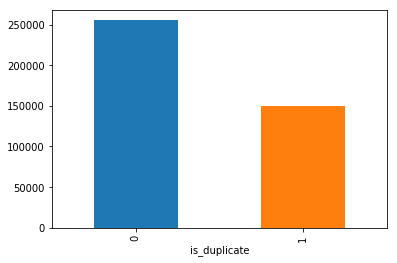

In [8]:
pt = train.groupby('is_duplicate')['id'].count()
pt.plot.bar()

The plot shows the is_duplicate distribution in the train data.

Text(0.5,1,'occurances of questions vs No of the questions.')

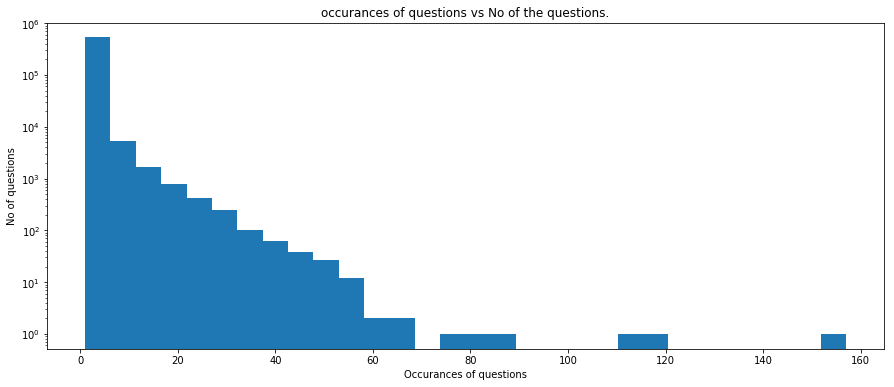

In [38]:
question_id_1 = train['qid1'].tolist()
question_id_2 = train['qid2'].tolist()
question_id = pd.Series(question_id_1+question_id_2)
plt.figure(figsize=(15,6))
plt.hist(question_id.value_counts(), bins= 30)
plt.yscale('log', nonposy='clip')
plt.xlabel('Occurances of questions')
plt.ylabel('No of questions')
plt.title('occurances of questions vs No of the questions.')

occurances of questions vs Frequecy of the ques- tions.

In [31]:
from nltk.corpus import stopwords as st

In [32]:
# Not included
stopwords_set = set(st.words("english"))
question_words_dict = {}
for word in sent.lower().split():
        if word not in stopwords_set:
            question_words_dict[word] = 1
print(question_words_dict)

{'read': 1, 'find': 1, 'youtube': 1, 'comments?': 1}


By plotting the no. of questions vs no. of occurences of the question, we observe that most of the questions only appear a few times, except very few.

In [33]:
from nltk.corpus import stopwords as st
stopwords_set = set(st.words("english"))

def word_dict(sentence):
    question_words_dict = {}
    for word in sentence.lower().split():
        if word not in stopwords_set:
            question_words_dict[word] = 1
    return question_words_dict
def common_words_percentage(entry):
    question_1_words = word_dict(str(entry['question1']))
    question_2_words = word_dict(str(entry['question2']))
     
    if len(question_1_words) == 0 or len(question_2_words) == 0:
        return 0
    shared_in_q1 = [word for word in question_1_words.keys() if word in question_2_words]
    feature_Ratio = ( 2*len(shared_in_q1) )/(len(question_1_words)+len(question_2_words))
    return feature_Ratio

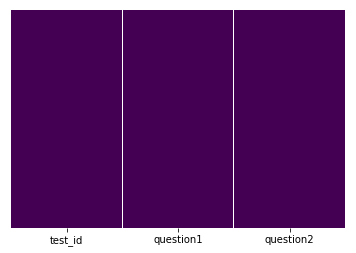

In [94]:
import seaborn as sns
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
def tfidf_weights(entry):
    question_1_words = word_dict(str(entry['question1']))
    question_2_words = word_dict(str(entry['question2']))
    if len(question_1_words) == 0 or len(question_2_words) == 0:
        return 0
    
    common_wts_1 = [weights.get(w, 0) for w in question_1_words.keys() if w in question_2_words]  
    common_wts_2 = [weights.get(w, 0) for w in question_2_words.keys() if w in question_2_words]
    common_wts = common_wts_1 + common_wts_2
    whole_wts = [weights.get(w, 0) for w in question_1_words] + [weights.get(w, 0) for w in question_2_words]
    
    feature_tfidf = np.sum(common_wts) / np.sum(whole_wts)
    return feature_tfidf

In [35]:
list_of_questions = (train['question1'].str.lower().astype('U').tolist() + 
                     train['question2'].str.lower().astype('U').tolist())

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 50,max_features = 3000000,ngram_range = (1,10))
X = vectorizer.fit_transform(list_of_questions)
idf = vectorizer.idf_
weights = (dict(zip(vectorizer.get_feature_names(), idf)))

In [47]:
# weights of idf coffecients.
weights

{'00': 10.04915924690928,
 '000': 7.304591037001674,
 '000 000': 10.398343519118855,
 '000 in': 9.893505937197487,
 '000 month': 9.415650332669065,
 '000 month playing': 10.614052091945545,
 '000 month playing poker': 10.651792419928393,
 '000 year': 10.221009503835939,
 '01': 10.59570295327735,
 '04': 9.920904911385602,
 '10': 6.198339978320729,
 '10 000': 9.200358756637542,
 '10 and': 10.24632731182023,
 '10 best': 10.221009503835939,
 '10 cgpa': 10.577684447774672,
 '10 days': 9.640191508249913,
 '10 how': 10.614052091945545,
 '10 in': 10.59570295327735,
 '10 million': 10.49216227433651,
 '10 minutes': 10.49216227433651,
 '10 year': 9.97806332522555,
 '10 year old': 10.184195530713223,
 '10 years': 8.822292622717491,
 '100': 7.244205240167467,
 '100 000': 9.712687010288066,
 '100 rupee': 10.459901412118288,
 '100 rupee notes': 10.542593127963402,
 '100 shares': 10.59570295327735,
 '100 years': 9.697761360071391,
 '1000': 5.742820779608637,
 '1000 and': 9.114098412353135,
 '1000 and 

In [37]:
train = train.dropna(axis=0, how='any')
test = test.dropna(axis=0, how='any')
X_TrainData = pd.DataFrame()
X_TestData = pd.DataFrame()
X_TrainData['common_word_percent'] = train.apply(common_words_percentage, axis=1, raw=True)
X_TrainData['feature_ifidf'] = train.apply(tfidf_weights, axis = 1, raw = True)
Y_TrainData = train['is_duplicate'].values
X_TestData['common_word_percent'] = test.apply(common_words_percentage, axis = 1, raw = True)
X_TestData['feature_ifidf'] = test.apply(tfidf_weights, axis = 1, raw = True)

/Users/dileesign/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


In [49]:
import nltk
def jaccard_similarity_coefficient(row):
    if (type(row['question1']) is str) and (type(row['question2']) is str):
        words_1 = row['question1'].lower().split()
        words_2 = row['question2'].lower().split()
    else:
        words_1 = nltk.word_tokenize(str(row['question1']))
        words_2 = nltk.word_tokenize(str(row['question2']))
   
    joint_words = set(words_1).union(set(words_2))
    intersection_words = set(words_1).intersection(set(words_2))
    return len(intersection_words)/len(joint_words)

In [50]:
X_TrainData['Jacard_Distance'] = train.apply(jaccard_similarity_coefficient, axis = 1, raw = True)
X_TestData['Jacard_Distance'] = test.apply(jaccard_similarity_coefficient, axis = 1, raw = True)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity as cs
import re, math
from collections import Counter

WORD = re.compile(r'\w+')
def _cosine_similarity(vector_1, vector_2):
     intersection = set(vector_1.keys()) & set(vector_2.keys())
     numerator = sum([vector_1[x] * vector_2[x] for x in intersection])

     sum1 = sum([vector_1[x]**2 for x in vector_1.keys()])
     sum2 = sum([vector_2[x]**2 for x in vector_2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def sentence_transform(sentence):
     words = WORD.findall(sentence)
     return Counter(words)

def cosine_sim(row):
    vector1 = sentence_transform(str(row['question1']))
    vector2 = sentence_transform(str(row['question2']))
    sim = _cosine_similarity(vector1,vector2)
    return sim

X_TrainData['cosine_sim'] = train.apply(cosine_sim,axis = 1,raw = True )
X_TestData['cosine_sim'] = test.apply(cosine_sim,axis = 1,raw = True )

In [52]:
X_TrainData2 = X_TrainData
Y_TrainData2 = Y_TrainData

In [109]:
#X_TrainData = X_TrainData.dropna(axis=0, how='any')
rows = ~X_TrainData.isnull().any(axis=1)
print('The Final features table of train data : \n')
X_TrainData = X_TrainData[rows]
print('\n')
print(X_TrainData.head(10))
Y_TrainData = Y_TrainData[rows]
print('\n')
print('The Label of Predicted class of train data',Y_TrainData)

The Final features table of train data : 



        common_word_percent  feature_ifidf  Jacard_Distance  cosine_sim
175974             0.571429       0.766709         0.545455    0.836660
239135             0.000000       0.585464         0.157895    0.402911
377930             0.750000       0.857464         0.800000    0.888889
366836             0.307692       1.000000         0.285714    0.648886
176692             0.181818       0.874099         0.045455    0.285714
86615              0.260870       0.746569         0.147059    0.341565
70341              0.923077       1.000000         0.916667    1.000000
309325             0.000000       0.466360         0.200000    0.666667
187894             0.222222       0.525389         0.285714    0.559017
12528              0.444444       0.711743         0.545455    0.589256


The Label of Predicted class of train data [0 0 0 ... 0 0 0]


from sklearn.cross_validation import train_test_split

X_TrainData, X_ValidData, Y_TrainData, Y_ValidData = train_test_split(X_TrainData, Y_TrainData, test_size=0.20,
                                                                      random_state=4242)

In [60]:
import xgboost as xgb

xg_TrainData = xgb.DMatrix(X_TrainData, label=Y_TrainData)
xg_ValidData = xgb.DMatrix(X_ValidData, label=Y_ValidData)

watchlist = [(xg_TrainData, 'train'), (xg_ValidData, 'valid')]

bst = xgb.train({'objective':'binary:logistic','eval_metric':'logloss','eta':0.02,'max_depth' :5}, 
                xg_TrainData, 500, watchlist, early_stopping_rounds=50, verbose_eval=10)

[17:56:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-logloss:0.685842	valid-logloss:0.685849
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[17:56:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:56:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:56:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:56:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:56:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:56:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:56:34] src/

[17:56:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:56:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[70]	train-logloss:0.487177	valid-logloss:0.487272
[17:56:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:56:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:56:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:56:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:56:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:56:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:56:50] src/tree/updater_prune.cc:74: tree pruning

[17:57:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:57:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[140]	train-logloss:0.454429	valid-logloss:0.454504
[17:57:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:57:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[17:57:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[17:57:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[17:57:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[17:57:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[17:57:06] src/tree/updater_prune.cc:74: tree prunin

[17:57:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[17:57:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[210]	train-logloss:0.446639	valid-logloss:0.446878
[17:57:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[17:57:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[17:57:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[17:57:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[17:57:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[17:57:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[17:57:20] src/tree/updater_prune.cc:74: tree prunin

[17:57:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[17:57:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[280]	train-logloss:0.443509	valid-logloss:0.444053
[17:57:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:57:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:57:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:57:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:57:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[17:57:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:57:35] src/tree/updater_prune.cc:74: tree prunin

[17:57:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[17:57:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[350]	train-logloss:0.44223	valid-logloss:0.442961
[17:57:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[17:57:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[17:57:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[17:57:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[17:57:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[17:57:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[17:57:49] src/tree/updater_prune.cc:74: tree pruning

[17:58:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[17:58:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[420]	train-logloss:0.440778	valid-logloss:0.441766
[17:58:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:58:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[17:58:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:58:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:58:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[17:58:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[17:58:03] src/tree/updater_prune.cc:74: tree prunin

[17:58:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[17:58:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[490]	train-logloss:0.439318	valid-logloss:0.440654
[17:58:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[17:58:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[17:58:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[17:58:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[17:58:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:58:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[17:58:17] src/tree/updater_prune.cc:74: tree prunin

In [61]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
data_with_imputed_values = my_imputer.fit_transform(X_TestData)

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline
classifier = LogisticRegression();
classifier.set_params(C = 10, max_iter = 10)
lr_model = classifier.fit(X_TrainData,
                          Y_TrainData)
Y_TestData_lr = lr_model.predict(data_with_imputed_values)
Y_TestData_lr

array([0, 1, 0, ..., 0, 1, 0])

In [64]:
"""testData = pd.DataFrame(columns = ['test_id','question1','question2'])
testData = testData.append([{'test_id':1,'question1':'how are you','question2':'where are you'}])
print (testData)
X_TestData1 = pd.DataFrame()
X_TestData1['cosine_sim'] = testData.apply(cosine_sim,axis = 1,raw = True )
X_TestData1['Jacard_Distance'] = testData.apply(jaccard_similarity_coefficient, axis = 1, raw = True)
X_TestData1['common_word_percent'] = testData.apply(common_words_percentage, axis = 1, raw = True)
X_TestData1['feature_ifidf'] = testData.apply(tfidf_weights, axis = 1, raw = True)"""

xg_TestData = xgb.DMatrix(X_TestData)
xg_ValidData = xgb.DMatrix(X_ValidData)

print('\n')
# print(xg_ValidData)

Predict_TestData = bst.predict(xg_TestData)
Predict_ValidData = bst.predict(xg_ValidData)

In [65]:
Predict_TestData

array([4.3836744e-03, 5.9915704e-01, 6.3717598e-01, ..., 6.6761714e-01,
       4.6088061e-01, 7.5223172e-05], dtype=float32)

In [98]:
Predict_ValidData

array([0.00133041, 0.1541672 , 0.596631  , ..., 0.5707513 , 0.49910337,
       0.00600963], dtype=float32)

Area under Roc Curve 0.8341650564840387


Text(0.5,1,'ROC Curve')

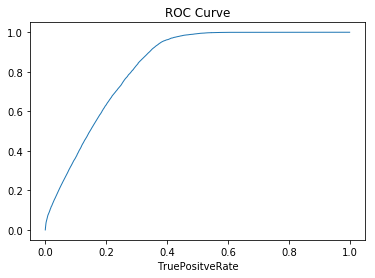

In [73]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve
fpr, tpr, _ = roc_curve(Y_ValidData, Predict_ValidData)
roc_area = auc(fpr, tpr)
print('Area under Roc Curve',roc_area)
plt.plot(fpr, tpr, lw=1)
np.round(roc_area, 10)
plt.xlabel('FalsePositveRate')
plt.xlabel('TruePositveRate')
plt.title('ROC Curve')

Acuracy through precision_recall_curve 0.6821685636932522


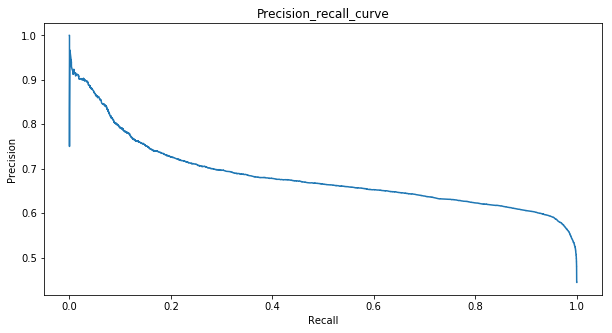

In [101]:
precison, recall, _ = precision_recall_curve(Y_ValidData, Predict_ValidData)
plt.figure(figsize=(10,5))

plt.plot(recall, precison)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_recall_curve')
print('Acuracy through precision_recall_curve', auc(recall, precison))

In [68]:
result = pd.DataFrame()
result['test_id'] = test['test_id']
result['is_duplicate'] = Predict_TestData
result.to_csv('result.csv', index=False)

In [69]:
Predict_TestData

array([4.3836744e-03, 5.9915704e-01, 6.3717598e-01, ..., 6.6761714e-01,
       4.6088061e-01, 7.5223172e-05], dtype=float32)

##We also checked the performance of RandomForest Classifier

In [93]:
 # Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_TrainData,Y_TrainData)
# Use the forest's predict method on the test data
predictions = rf.predict(X_ValidData)
# Calculate the absolute errors
errors = abs(Y_ValidData - predictions)
# Print out the mean absolute error (mae)
print('Mean Absolute Error: Using Random Forest Model', round(np.mean(errors), 2), 'degrees.')
print("Accuracy: using Random Forest Model",metrics.accuracy_score(Y_ValidData, predictions))

Mean Absolute Error: Using Random Forest Model 0.26 degrees.
Accuracy: using Random Forest Model 0.739998999274474
